In [38]:
import pandas as pd
import sklearn
import numpy as np

credit=pd.read_csv("Credit.csv")
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [39]:
#We don't need the ID column,so lets drop it.
credit = credit.drop(["ID"],axis=1)

In [40]:
#changing the name of  pay_0 column to pay_1 to make the numbering correct

In [41]:
credit.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [42]:
credit.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [43]:
#Removing Unwanted categorical levels as mentioned in data exploration
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [44]:
#Changing Education levels 0,5,6 to others(4)
credit["EDUCATION"]=credit["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [45]:
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [46]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [47]:
#similarly chaning marriage level 0 to level 3
credit["MARRIAGE"]=credit["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [48]:
credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [49]:
#lets check which features are important
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X = credit.drop('default.payment.next.month',axis=1)
Y = credit['default.payment.next.month']
clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
clf.feature_importances_

array([0.06627728, 0.01190175, 0.0298589 , 0.01985772, 0.06673146,
       0.09779172, 0.05035243, 0.03272023, 0.02998265, 0.03002053,
       0.02943612, 0.05038996, 0.04729678, 0.04519189, 0.04444649,
       0.04374945, 0.04483963, 0.04384918, 0.04263168, 0.04213908,
       0.04136008, 0.04305637, 0.04611863])

In [50]:
#Feature Scaling

<AxesSubplot:>

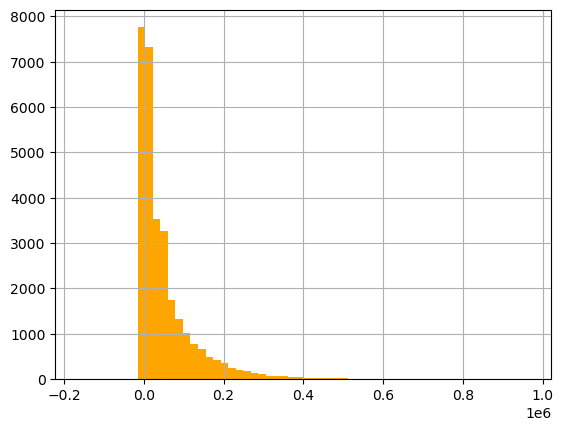

In [51]:
%matplotlib inline
#feature scaling check
credit['BILL_AMT1'].hist(bins=60, color='orange')

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(credit)

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.        , 0.00378311,
        1.        ],
       [0.08080808, 1.        , 0.33333333, ..., 0.00234451, 0.00945777,
        0.        ],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00468901, 0.00586382,
        1.        ],
       [0.07070707, 0.        , 0.66666667, ..., 0.12417444, 0.00341236,
        1.        ],
       [0.04040404, 0.        , 0.33333333, ..., 0.00234451, 0.00189155,
        1.        ]])

In [53]:
#check for null values
credit.apply(lambda x: sum(x.isnull()),axis=0) 

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [54]:
#Initial Model training(except feed forward neural network)
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit, test_size = 0.3)

X_train = train.drop('default.payment.next.month',axis=1)

y_train = train['default.payment.next.month']

X_test =  test.drop('default.payment.next.month',axis=1)

y_test = test['default.payment.next.month']

In [55]:
#Train benchmark model(Log Regression)
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression(random_state=10)
clf0.fit(X_train, y_train)

/Users/johnsu/opt/anaconda3/envs/testing_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 0.7847777777777778
Precision: 0.8311035300218542
Recall: 0.7847777777777778
f1_score: 0.6902558539576802


In [57]:
#Train other classifiers
#We start with randomforest
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(random_state=10)
clf1.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [58]:
y_pred1 = clf1.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred1)
precision_rf=precision_score(y_test, y_pred1,average='weighted')
recall_rf=recall_score(y_test, y_pred1,average='weighted')
f1_rf=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)

accuracy: 0.8197777777777778
Precision: 0.8012865997808915
Recall: 0.8197777777777778
f1_score: 0.8008590205689552


In [59]:
#gradeint boost
from sklearn.ensemble import GradientBoostingClassifier
clf2=GradientBoostingClassifier(random_state=10)
clf2.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10)

In [60]:
y_pred2 = clf2.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)

accuracy: 0.827
Precision: 0.8107158288125635
Recall: 0.827
f1_score: 0.8066980165528457


In [61]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier(random_state=10)
clf3.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [62]:
y_pred3 = clf3.predict(X_test)
accuracy_ab=accuracy_score(y_test, y_pred3)
precision_ab=precision_score(y_test, y_pred3,average='weighted')
recall_ab=recall_score(y_test, y_pred3,average='weighted')
f1_ab=f1_score(y_test,y_pred3,average='weighted')
print("accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print('f1_score:',f1_ab)

accuracy: 0.8227777777777778
Precision: 0.8056080009095432
Recall: 0.8227777777777778
f1_score: 0.7971358475251681


In [63]:
#voting classifier
from sklearn.ensemble import VotingClassifier
clf4 = VotingClassifier(estimators=[('rf',clf1),('gb', clf2),('ab',clf3)])
clf4.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=10)),
                             ('gb',
                              GradientBoostingClassifier(random_state=10)),
                             ('ab', AdaBoostClassifier(random_state=10))])

In [64]:
y_pred4 = clf4.predict(X_test)
accuracy_vc=accuracy_score(y_test, y_pred4)
precision_vc=precision_score(y_test, y_pred4,average='weighted')
recall_vc=recall_score(y_test, y_pred4,average='weighted')
f1_vc=f1_score(y_test,y_pred4,average='weighted')
print("accuracy:", accuracy_vc)
print("Precision:", precision_vc)
print("Recall:", recall_vc)
print('f1_score:',f1_vc)

accuracy: 0.8264444444444444
Precision: 0.8100940685045948
Recall: 0.8264444444444444
f1_score: 0.8048093812421007


In [65]:
#appending all socres
arraycuracy=[]
arraycuracy.append(accuracy_regr)
arraycuracy.append(accuracy_rf)
arraycuracy.append(accuracy_gb)
arraycuracy.append(accuracy_ab)
arraycuracy.append(accuracy_vc)

In [66]:
precisionray=[]
precisionray.append(precision_regr)
precisionray.append(precision_rf)
precisionray.append(precision_gb)
precisionray.append(precision_ab)
precisionray.append(precision_vc)

In [67]:
recallray=[]
recallray.append(recall_regr)
recallray.append(recall_rf)
recallray.append(recall_gb)
recallray.append(recall_ab)
recallray.append(recall_vc)

In [68]:
f1ray=[]
f1ray.append(f1_regr)
f1ray.append(f1_rf)
f1ray.append(f1_gb)
f1ray.append(f1_ab)
f1ray.append(f1_vc)

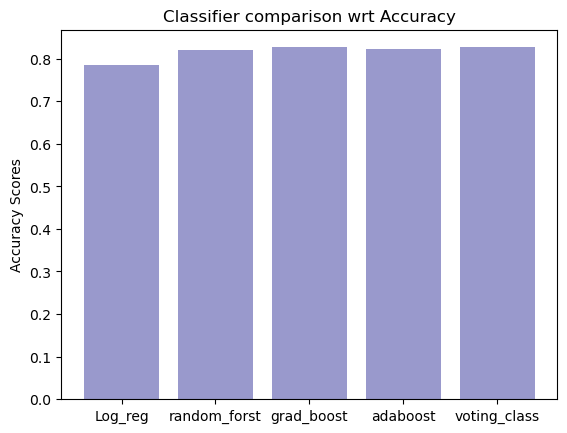

In [69]:
#Lets compare Accuracy,precison,racall
import matplotlib.pyplot as plt
classifier_names=('Log_reg','random_forst','grad_boost','adaboost','voting_class')
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis, arraycuracy, alpha=0.4,color='navy',ecolor='navy')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Accuracy Scores')
plt.title('Classifier comparison wrt Accuracy')
plt.show()

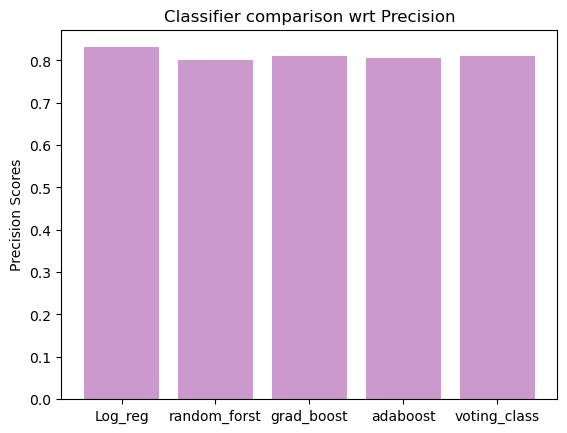

In [70]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,precisionray, alpha=0.4,color='purple',ecolor='darkgreen')
plt.xticks(y_axis, classifier_names)
plt.ylabel('Precision Scores')
plt.title('Classifier comparison wrt Precision')
plt.show()

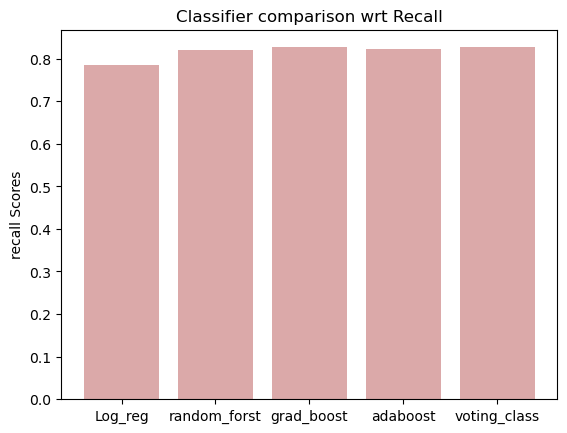

In [71]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,recallray, alpha=0.4,color='brown',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('recall Scores')
plt.title('Classifier comparison wrt Recall')
plt.show()

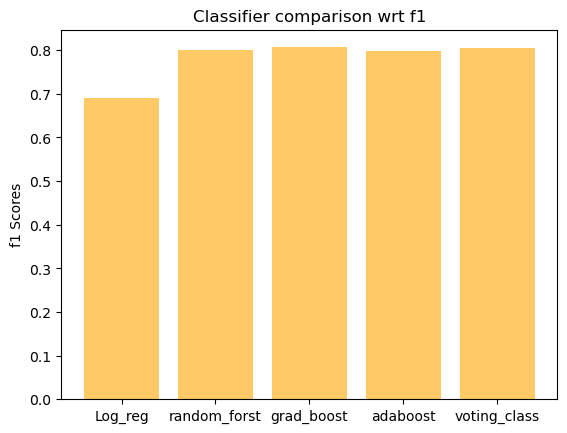

In [72]:
y_axis=np.arange(len(classifier_names))
plt.bar(y_axis,f1ray, alpha=0.6,color='orange',ecolor='black')
plt.xticks(y_axis, classifier_names)
plt.ylabel('f1 Scores')
plt.title('Classifier comparison wrt f1')
plt.show()

In [73]:
#Some fine REFINEMENTS to GBboost,Rfforest,and Adaboost
#PERFROM GRIDSEARCH CV on RF,GB and Adaboost to find best parameter values on 10 fold cross validation set
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


parameters_ada ={'n_estimators' :[15,25,50],
            }



clf = GridSearchCV(AdaBoostClassifier(random_state=10), parameters_ada,cv=10,scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters for Adaboost:",clf.best_params_)

Best parameters for Adaboost: {'n_estimators': 50}


In [74]:
parameters_boost ={'n_estimators' :[15,25,50],
             'min_samples_split' :[3,10,15]
}

clf00 = GridSearchCV(GradientBoostingClassifier(random_state=10), cv=10, param_grid=parameters_boost, scoring='accuracy')
clf00.fit(X_train,y_train)
print("Best parameters for GradeintBoosting:",clf00.best_params_)


clf001 = GridSearchCV(RandomForestClassifier(random_state=10), cv=10, param_grid=parameters_boost,scoring='accuracy')
clf001.fit(X_train,y_train)
print("Best parameters for RandomForest:",clf001.best_params_)

Best parameters for GradeintBoosting: {'min_samples_split': 3, 'n_estimators': 15}
Best parameters for RandomForest: {'min_samples_split': 15, 'n_estimators': 50}


In [75]:
#Use the above parameter values for our Weighted voting CLassifier

#First we have to calibrate our classsifers

#Isotonic claibration
from sklearn.calibration import CalibratedClassifierCV
clfvc1 = RandomForestClassifier(n_estimators=50,min_samples_split=15,random_state=10)
clfvc2=AdaBoostClassifier(n_estimators=15,random_state=10)
clfvc3=GradientBoostingClassifier(n_estimators=50,min_samples_split=15,random_state=10)
clf_isotonic1 = CalibratedClassifierCV(clfvc1, method='isotonic',cv=10)
clf_isotonic2 = CalibratedClassifierCV(clfvc2, method='isotonic',cv=10)
clf_isotonic3 = CalibratedClassifierCV(clfvc3, method='isotonic',cv=10)

In [77]:
#Inputing the istonic calibration to voting classifier with weights.
clfvc = VotingClassifier(estimators=[('rf',clf_isotonic1),('ab', clf_isotonic2),('gb',clf_isotonic3)],voting='soft',weights=[1,1,2])
clfvc.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              CalibratedClassifierCV(base_estimator=RandomForestClassifier(min_samples_split=15,
                                                                                           n_estimators=50,
                                                                                           random_state=10),
                                                     cv=10,
                                                     method='isotonic')),
                             ('ab',
                              CalibratedClassifierCV(base_estimator=AdaBoostClassifier(n_estimators=15,
                                                                                       random_state=10),
                                                     cv=10,
                                                     method='isotonic')),
                             ('gb',
                              CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(min_samples_split=15,
                                                                                               n_estimators=50,
                                                                                               random_state=10),
                                                     cv=10,
                                                     method='isotonic'))],
                 voting='soft', weights=[1, 1, 2])

In [78]:
y_predvc = clfvc.predict(X_test)
accuracy_vciso=accuracy_score(y_test, y_predvc)

In [79]:
precision_vciso=precision_score(y_test, y_predvc)

In [81]:
#Results of weighted voting classifer
y_predvc = clfvc.predict(X_test)
accuracy_vciso=accuracy_score(y_test, y_predvc)
precision_vciso=precision_score(y_test, y_predvc,average='weighted')
recall_vciso=recall_score(y_test, y_predvc,average='weighted')
f1_vciso=f1_score(y_test,y_predvc,average='weighted')
print("accuracy:", accuracy_vciso)
print("Precision:", precision_vciso)
print("Recall:", recall_vciso)
print('f1_score:',f1_vciso)
print('Training_time:',time.time() - t0)

accuracy: 0.8278888888888889
Precision: 0.8119441291433238
Recall: 0.8278888888888889
f1_score: 0.8075003449061734
Training_time: 176.67919898033142


In [83]:
#Training just the Gradient Boost(clfvc3) with tuned parameters from above
t1 = time.time()
clfvc3.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_split=15, n_estimators=50,
                           random_state=10)

In [85]:
#results of Tuned Gradient Boosting classifer
y_predgb2 = clfvc3.predict(X_test)
accuracy_gb2=accuracy_score(y_test, y_predgb2)
precision_gb2=precision_score(y_test, y_predgb2,average='weighted')
recall_gb2=recall_score(y_test, y_predgb2,average='weighted')
f1_gb2=f1_score(y_test,y_predgb2,average='weighted')
print("accuracy:", accuracy_gb2)
print("Precision:", precision_gb2)
print("Recall:", recall_gb2)
print('f1_score:',f1_gb2)
print('Training_time:',time.time() - t1)

accuracy: 0.8283333333333334
Precision: 0.8126130659341575
Recall: 0.8283333333333334
f1_score: 0.8075496255646168
Training_time: 5.782366037368774


In [86]:
#FINAL EVALUATION USING Stratified 10-fold CV on VC
from sklearn.model_selection import cross_val_score
#accuracy
scores = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10)
scores.mean()

0.8224666666666668

In [87]:
from sklearn.model_selection import cross_val_score
#f1
scores1 = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='f1_weighted')
scores1.mean()

0.8005237998811415

In [88]:
#Precision
scores2 = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='precision_weighted')
scores2.mean()

0.8067674570739258

In [89]:
#Recall
scores3 = cross_val_score(clfvc3, credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='recall_weighted')
scores3.mean()

0.8224666666666668

In [90]:
#corss validated final results of tuned Gradient Boosting
print("Accuracy:",scores.mean())
print("Precision:",scores2.mean())
print("Recall:",scores3.mean())
print("F1:",scores1.mean())

Accuracy: 0.8224666666666668
Precision: 0.8067674570739258
Recall: 0.8224666666666668
F1: 0.8005237998811415


In [91]:
#lets crossvalidate log regression 
#f1
import warnings
warnings.filterwarnings("ignore")
scores4 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='f1_weighted')
scores4.mean()

0.6821751425708367

In [92]:
#accuracy
scores5 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10)
scores5.mean()

0.7788666666666666

In [93]:
#precision 
scores6 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='precision_weighted')
scores6.mean()

0.6729177464747509

In [94]:
#Recall
scores7 = cross_val_score(LogisticRegression(C=0.8,random_state=10), credit.drop('default.payment.next.month',axis=1), credit['default.payment.next.month'],cv=10,scoring='recall_weighted')
scores7.mean()

0.7788666666666666

In [95]:
print("Accuracy:",scores5.mean())
print("Precision:",scores6.mean())
print("Recall:",scores7.mean())
print("F1:",scores4.mean())

Accuracy: 0.7788666666666666
Precision: 0.6729177464747509
Recall: 0.7788666666666666
F1: 0.6821751425708367


In [97]:
all_scores

[array([0.80666667, 0.80933333, 0.81666667, 0.81033333, 0.82366667,
        0.83      , 0.83566667, 0.83633333, 0.82866667, 0.82733333]),
 array([0.78442888, 0.78819899, 0.79847308, 0.78955673, 0.80818914,
        0.8161292 , 0.82347508, 0.82860224, 0.81646123, 0.81416   ]),
 array([0.80666667, 0.80933333, 0.81666667, 0.81033333, 0.82366667,
        0.83      , 0.83566667, 0.83633333, 0.82866667, 0.82733333]),
 array([0.78217542, 0.78539284, 0.7958363 , 0.78598693, 0.80181956,
        0.81508604, 0.81839966, 0.81239097, 0.80452989, 0.80362041])]